# Initialize Model Inputs

In [1]:
# General
import pandas as pd
import numpy as np
import os

# umap
import umap

# sklearn
import sklearn
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Visualization
import plotly.express as px
import plotly.graph_objects as go

# Init variables
DATA_DIR = "~/Desktop/code/data/"
RANDOM_SEED = 42
TARGET = "media_id" 

In [2]:
# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
filter = df["ec"].str.contains("-")
df = df[~filter]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]
df

ec                                             taxon_id media_id  1.1.1.1  \
0                                                 100.0     J346      0.0   
1                                                 100.0     J386      1.0   
2                                              100225.0     J233      0.0   
3                                             1002526.0      J22      0.0   
4                                             1004166.0       1a      1.0   
...                                                 ...      ...      ...   
8706  KBase_derived_Bin.033.fastaLS_S_extracted_bins...  unknown      1.0   
8707  KBase_derived_Bin.034.fastaCA_F_extracted_bins...  unknown      0.0   
8708  KBase_derived_Bin.037.fastaLS_S_extracted_bins...  unknown      0.0   
8709  KBase_derived_Bin.038.fastaLS_S_extracted_bins...  unknown      0.0   
8710  KBase_derived_Bin.039.fastaLS_S_extracted_bins...  unknown      0.0   

ec    1.1.1.100  1.1.1.101  1.1.1.102  1.1.1.103  1.1.1.105  1.1.1.107  \
0           0.0        0.0        0.0        0.0        0.0        0.0   
1           0.0        0.0        0.0        0.0        0.0        0.0   
2           0.0        0.0        0.0        0.0        0.0        0.0   
3           0.0        0.0        0.0        0.0        0.0        0.0   
4           0.0        0.0        0.0        1.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
8706        0.0        0.0        0.0        0.0        0.0        0.0   
8707        0.0        0.0        0.0        0.0        0.0        0.0   
8708        0.0        0.0        0.0        0.0        0.0        0.0   
8709        0.0        0.0        0.0        1.0        0.0        0.0   
8710        0.0        0.0        0.0        0.0        0.0        0.0   

ec    1.1.1.108  ...  7.6.2.12  7.6.2.13  7.6.2.14  7.6.2.15  7.6.2.16  \
0           0.0  ...       0.0       0.0       0.0       0.0       0.0   
1           0.0  ...       0.0       0.0       0.0       0.0       0.0   
2           0.0  ...       0.0       0.0       0.0       0.0       0.0   
3           0.0  ...       0.0       0.0       0.0       0.0       0.0   
4           0.0  ...       0.0       0.0       0.0       0.0       0.0   
...         ...  ...       ...       ...       ...       ...       ...   
8706        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8707        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8708        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8709        0.0  ...       0.0       0.0       0.0       0.0       0.0   
8710        0.0  ...       0.0       0.0       0.0       0.0       0.0   

ec    7.6.2.2  7.6.2.5  7.6.2.7  7.6.2.8  7.6.2.9  
0         0.0      0.0      0.0      0.0      0.0  
1         0.0      0.0      0.0      0.0      0.0  
2         0.0      0.0      0.0      0.0      0.0  
3         0.0      0.0      0.0      0.0      0.0  
4         0.0      0.0      0.0      0.0      0.0  
...       ...      ...      ...      ...      ...  
8706      0.0      0.0      0.0      0.0      1.0  
8707      0.0      0.0      0.0      0.0      0.0  
8708      0.0      1.0      0.0      0.0      1.0  
8709      0.0      0.0      0.0      0.0      1.0  
8710      0.0      1.0      0.0      0.0      0.0  

[8711 rows x 3636 columns]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id"], axis=1),
    df_train[TARGET],
    test_size=0.2,
    random_state=RANDOM_SEED
)

# Supervised Methods

## Random Forest

In [4]:
rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=RANDOM_SEED
)

rft = rfc.fit(X_train, y_train)

report = classification_report(
    y_true=y_test,
    y_pred=rft.predict(X_test),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report)

              precision    recall  f1-score   support

       1031a       0.00      0.00      0.00         0
        104a       0.00      0.00      0.00         1
        104b       0.56      0.62      0.59         8
        104c       0.00      0.00      0.00         5
        104d       0.00      0.00      0.00         1
       1076b       0.67      0.67      0.67         6
       1081a       0.00      0.00      0.00         1
        110a       0.00      0.00      0.00         2
        115a       0.00      0.00      0.00         0
         11b       0.00      0.00      0.00         3
       1203a       0.54      0.30      0.39        23
        141c       0.00      0.00      0.00         1
        142a       1.00      1.00      1.00         1
        144b       0.00      0.00      0.00         1
        195c       0.00      0.00      0.00         1
          1a       0.25      0.32      0.28        28
        212a       1.00      1.00      1.00         1
        215b       0.50    

In [5]:
report_train = classification_report(
    y_true=y_train,
    y_pred=rft.predict(X_train),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report_train)

              precision    recall  f1-score   support

       1012a       1.00      1.00      1.00         1
       1031a       0.25      0.14      0.18         7
        104a       0.00      0.00      0.00         2
        104b       0.53      0.61      0.57        31
        104c       0.67      0.25      0.36        16
       1058e       0.00      0.00      0.00         1
       1076b       0.96      1.00      0.98        25
       1081a       0.00      0.00      0.00         1
        110a       0.67      0.29      0.40         7
        115a       1.00      0.50      0.67         2
         11a       0.00      0.00      0.00         1
         11b       0.73      0.80      0.76        10
       1203a       0.80      0.66      0.72        79
        120a       0.31      1.00      0.47         4
        120c       0.00      0.00      0.00         1
        120d       1.00      0.50      0.67         2
       1266a       1.00      1.00      1.00         1
       1277a       0.00    

In [14]:
#import shap

#model = rfc.fit(X_train, y_train)
#explainer = shap.Explainer(model)
#shap_values = explainer(X_train)

#shap.plots.initjs()
#shap.plots.beeswarm(shap_values, max_display=11)
#shap.plots.bar(shap_values, max_display=40)

#NOTE: insufficient power (97 GiB to apply explainer to Random Forest model of this size)

## K-Neighbors

In [16]:
knc = KNeighborsClassifier(n_neighbors=20)
knt = knc.fit(X_train, y_train)

distances, indices = knt.kneighbors(X_test)

print(knt.predict(X_test))
indices

[ 8. 48.  1. ...  8.  0. 15.]


array([[ 176,  817,  940, ...,  474,  507,   71],
       [ 842,  714, 4517, ..., 3221, 4557, 5357],
       [ 354, 6648,  582, ..., 1179, 1640,   91],
       ...,
       [ 176,  817,  940, ...,  474,  507,   71],
       [5133, 2608, 3841, ..., 2507, 2431,  153],
       [ 223, 1011,  741, ...,  386,  766,  108]], dtype=int64)

In [18]:
report_test = classification_report(
    y_true=y_test,
    y_pred=knt.predict(X_test),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report_test)

              precision    recall  f1-score   support

         0.0       0.24      0.44      0.31        81
         1.0       0.38      0.71      0.49        21
         2.0       0.00      0.00      0.00         0
         3.0       0.35      0.28      0.31       102
         4.0       0.29      0.32      0.31        28
         5.0       0.00      0.00      0.00         4
         6.0       0.12      1.00      0.22         1
         8.0       0.26      0.53      0.35       141
         9.0       0.00      0.00      0.00         1
        10.0       0.60      0.19      0.29        16
        11.0       0.07      0.08      0.08        12
        12.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         2
        15.0       0.26      0.69      0.38        78
        16.0       0.32      0.29      0.30        49
        17.0       0.16      0.07      0.10        40
        18.0       0.25    

In [17]:
report_train = classification_report(
    y_true=y_train,
    y_pred=knt.predict(X_train),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

print(report_train)

              precision    recall  f1-score   support

         0.0       0.33      0.55      0.41       327
         1.0       0.37      0.58      0.45       107
         2.0       0.00      0.00      0.00         2
         3.0       0.41      0.45      0.43       392
         4.0       0.28      0.20      0.23       111
         5.0       0.00      0.00      0.00        19
         6.0       0.33      1.00      0.50         8
         7.0       0.00      0.00      0.00         1
         8.0       0.30      0.62      0.40       547
         9.0       0.60      0.21      0.32        14
        10.0       0.28      0.06      0.10        82
        11.0       0.25      0.17      0.21        40
        12.0       0.00      0.00      0.00        10
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         2
        15.0       0.26      0.71      0.38       283
        16.0       0.22      0.35      0.27       139
        17.0       0.23    

## XGBoost 

C:\Users\jakel\AppData\Local\Temp\ipykernel_15708\205839374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)


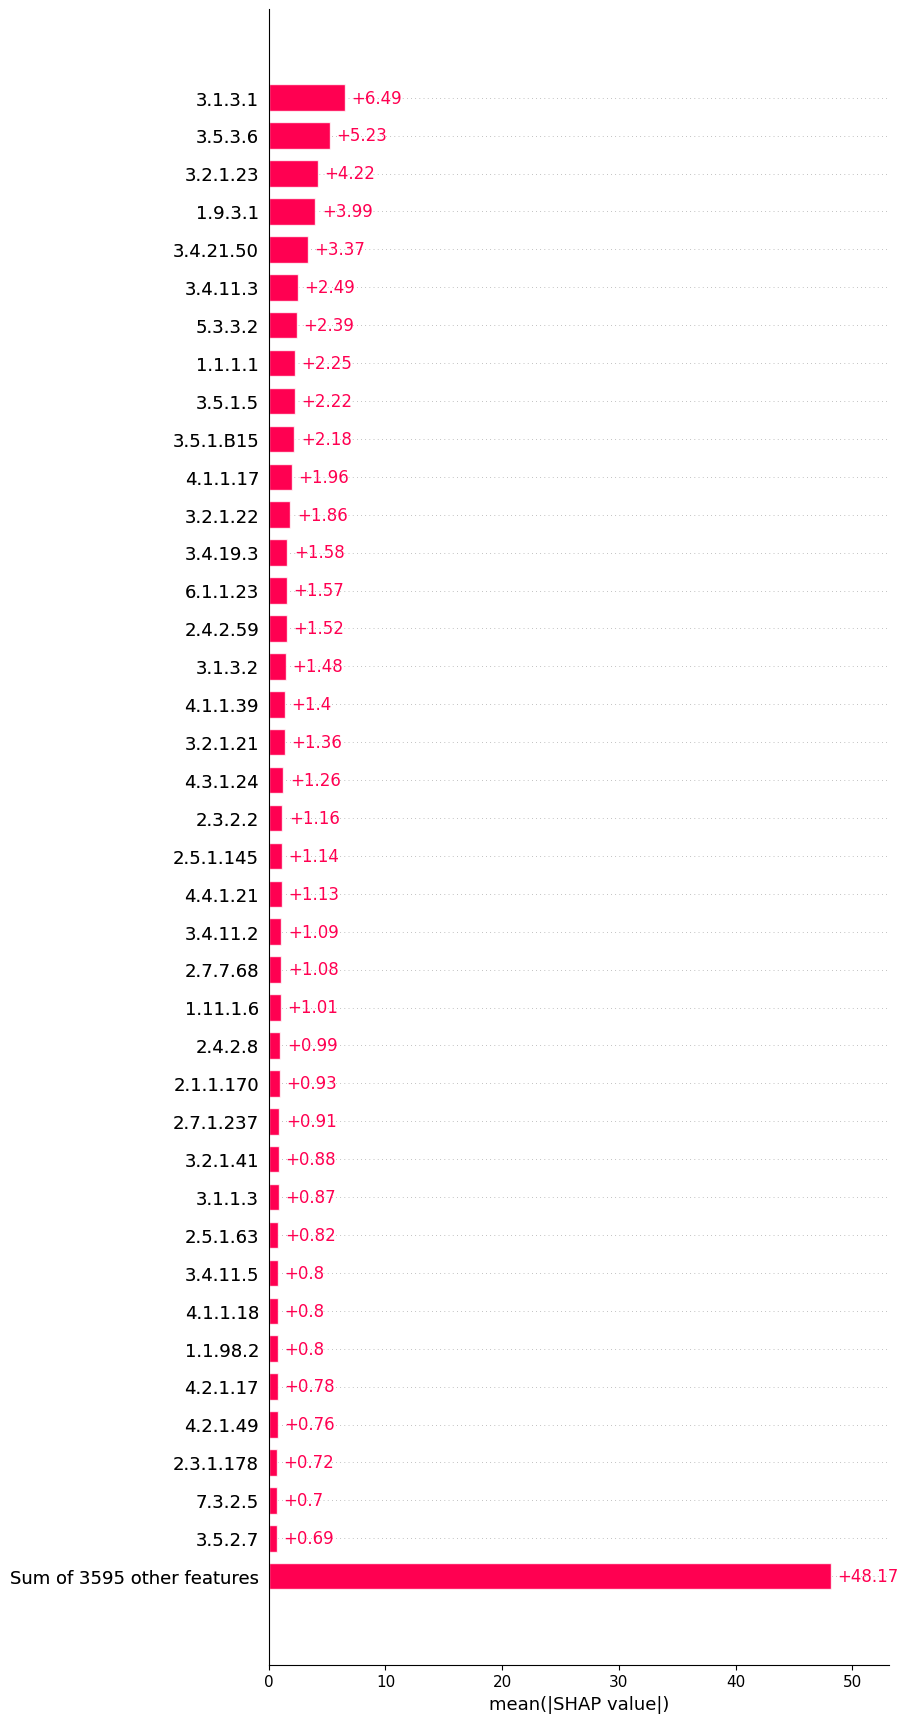

In [11]:
import xgboost
import shap

# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    random_state=RANDOM_SEED
)

model = xgboost.XGBRegressor().fit(X_train , y_train)

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

shap.plots.initjs()
#shap.plots.beeswarm(shap_values, max_display=11)
shap.plots.bar(shap_values, max_display=40)

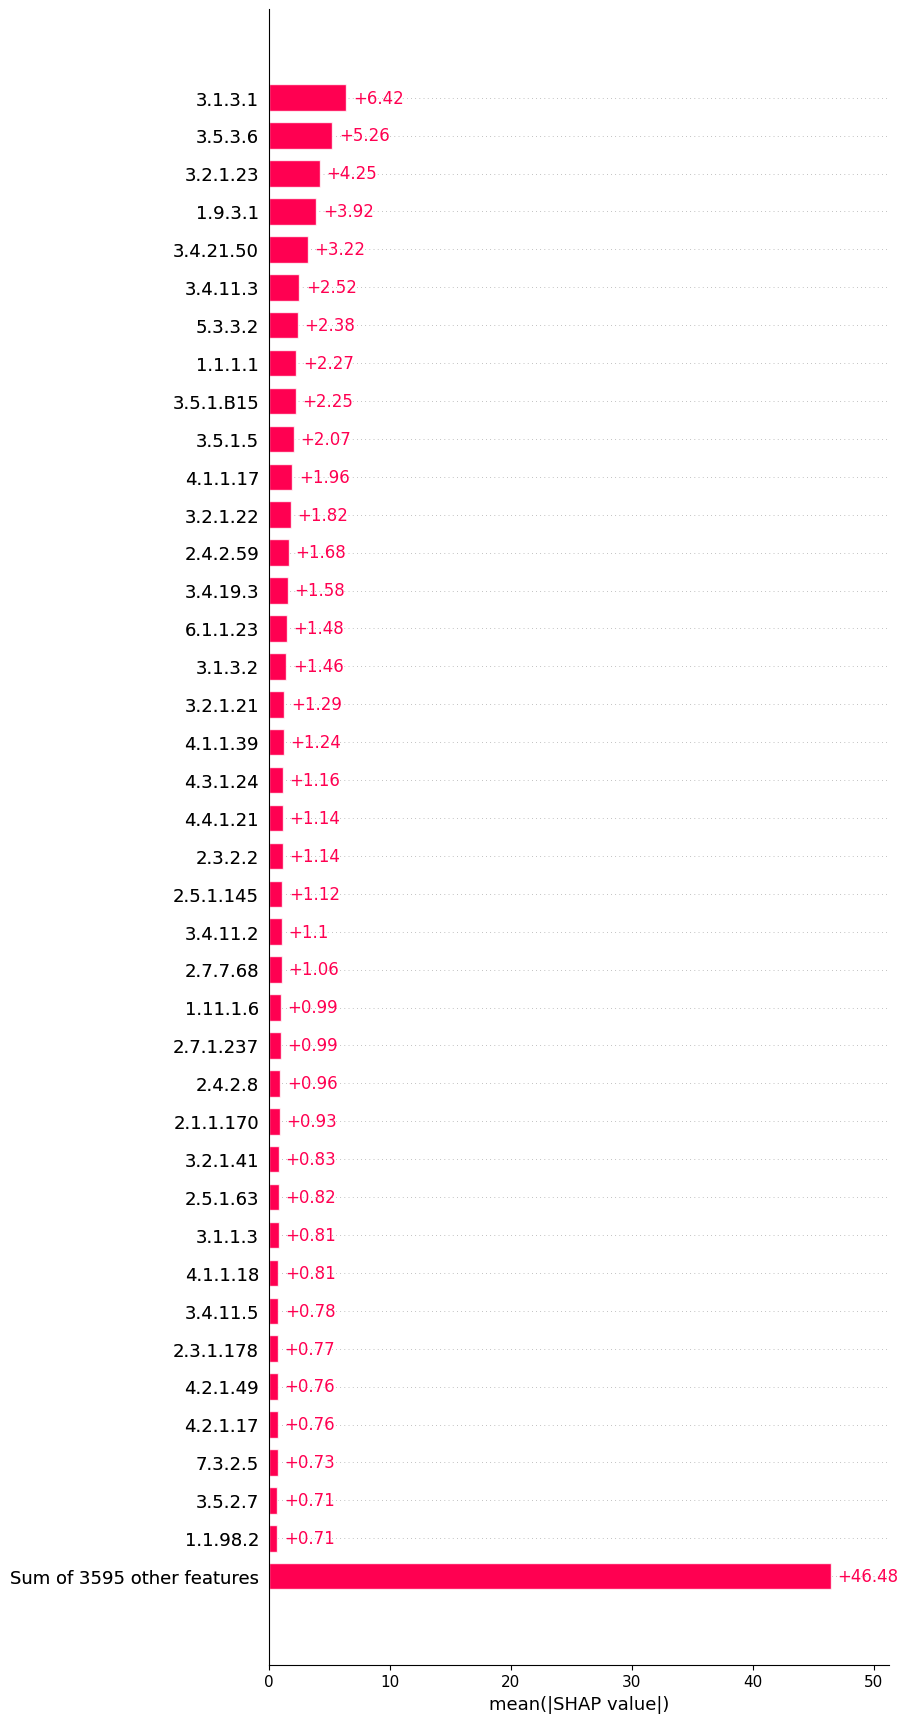

In [12]:
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=40)

# Unsupervised Methods

## PCA

In [66]:
pca = PCA(n_components=2, random_state= RANDOM_SEED)

X_train_transformed = pca.fit_transform(X_train) # fit pipeline and transform training data
X_test_transformed = pca.transform(X_test) # transform test data

explained_variance = pca.explained_variance_ratio_
print(f"Total PCA explained variance: {explained_variance.sum()}")

Total PCA explained variance: 0.5848448868881663


In [67]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

3 clusters returns a maximum Silhouette Coefficient of 0.9589926667049252


In [68]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

3 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8526420789036175


In [69]:
import plotly.express as px
fig = px.scatter_matrix(
    X_train_transformed,
    color=training_clusters,
    dimensions=range(2),
    #labels="taxon_id"
    )
fig.update_traces(diagonal_visible=False)
fig.show()

## UMAP

In [4]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    random_state=RANDOM_SEED
)

C:\Users\jakel\AppData\Local\Temp\ipykernel_20796\2910204531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)


### Euclidean

In [56]:
# Test a range of parameters for dimensionality reduction
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

#umap = umap.UMAP(  
#    metric="euclidean",
#    n_epochs=500,
#    random_state=RANDOM_SEED,
#    n_jobs=1,
#    n_components=2
#)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

#search.fit(X_train, y_train)
#best_params = search.best_params_
#best_model = search.best_estimator_

#print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [66]:
reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x00000280CACF5B20>
Traceback (most recent call last):
  File "c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


In [67]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

12 clusters returns a maximum Silhouette Coefficient of 0.8306539058685303


In [68]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

12 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8258286118507385


In [72]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

6771 training points
1693 test points


In [84]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

### Hamming

In [59]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="hamming",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

search.fit(X_train, y_train)
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [5]:
import umap

reducer = umap.UMAP(             
    metric="hamming",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


In [6]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 50):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

16 clusters returns a maximum Silhouette Coefficient of 0.7757910490036011


In [7]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=n, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

16 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.7445780038833618


In [8]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

# Create a reverse mapping from float back to media_id, remap to original values
reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = train_df['Target'].map(reverse_media_id_mapping)

print(len(train_df), "training points")


# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
test_df['media_id'] = test_df['Target'].map(reverse_media_id_mapping)

print(len(test_df), "test points")

6771 training points
1693 test points


In [9]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0 
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

### Jaccard

In [10]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="jaccard",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

search.fit(X_train, y_train)
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pynndescent\pynndescent_.py:962: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:127: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has r

Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [12]:
import umap

reducer = umap.UMAP(             
    metric="jaccard",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:1880: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\pynndescent\pynndescent_.py:962: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\umap\umap_.py:127: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 5936 edges.
It has only fully disconnected 46 vertices.
Use umap.utils.disconnected_vertices() to identify them.



In [13]:
#TODO: DISCONNECT MEANS KMEANS CANNOT CLUSTER -- NO NAN!

In [23]:
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])
train_df = train_df.dropna()

test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])
test_df = test_df.dropna()

In [17]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 50):
    kmeans = KMeans(n_clusters=n_cluster).fit(train_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(train_df, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

3 clusters returns a maximum Silhouette Coefficient of 0.7786913514137268


In [26]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=20, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(train_df)
test_clusters = clusterer.predict(test_df)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(train_df, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

20 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.7283972501754761


In [27]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df = train_df.dropna()
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df = test_df.dropna()
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

6725 training points
1658 test points


In [28]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color ="KMeans Cluster",
    hover_data = ["Target"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0
        ),
        text=test_df["Target"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

# Media Clustering

## Taxonomy as features

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

bins = df["source"].str.contains("KBase")
df = df[~bins]

df = df[["media_id", "taxon_id"]]
df = df.drop_duplicates()

df = df[["media_id", "taxon_id"]].value_counts().reset_index()
df = df.pivot(index="media_id", columns="taxon_id", values="count")
df = df.fillna(0.0).reset_index()

df.head()

taxon_id media_id  100.0  100225.0  1002526.0  1004166.0  1004261.0  \
0           1012a    0.0       0.0        0.0        0.0        0.0   
1           1031a    0.0       0.0        0.0        0.0        0.0   
2            104a    0.0       0.0        0.0        0.0        0.0   
3            104b    0.0       0.0        0.0        0.0        0.0   
4            104c    0.0       0.0        0.0        0.0        0.0   

taxon_id  1005039.0  1005740.0  1005926.0  1005928.0  ...  99480.0  99481.0  \
0               0.0        0.0        0.0        0.0  ...      0.0      0.0   
1               0.0        0.0        0.0        0.0  ...      0.0      0.0   
2               0.0        0.0        0.0        0.0  ...      0.0      0.0   
3               0.0        0.0        0.0        0.0  ...      0.0      0.0   
4               0.0        0.0        0.0        0.0  ...      0.0      0.0   

taxon_id  995054.0  99597.0  996.0  99653.0  99655.0  99675.0  99807.0  \
0              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
1              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
2              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
3              0.0      0.0    0.0      0.0      0.0      0.0      0.0   
4              0.0      0.0    0.0      0.0      0.0      0.0      0.0   

taxon_id  999931.0  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 5956 columns]

In [4]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df['media_id'].unique())}
df['media_id_float'] = df['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["media_id", "media_id_float"], axis=1),
    df["media_id_float"],
    test_size=0.2,
    #stratify=, #for binary, balance train/test set
    random_state=RANDOM_SEED
)

In [5]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="euclidean",
    n_epochs=500,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

#search.fit(X_train, y_train)
#best_params = search.best_params_
#best_model = search.best_estimator_

#print("Best Parameters:", best_params) 

In [13]:
import umap

reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

In [15]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 300):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMe

3 clusters returns a maximum Silhouette Coefficient of 0.6654398441314697


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [28]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=8, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

8 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.5721889734268188


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [29]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

# Create a reverse mapping from float back to media_id, remap to original values
reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = train_df['Target'].map(reverse_media_id_mapping)


print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
test_df['media_id'] = test_df['Target'].map(reverse_media_id_mapping)


print(len(test_df), "test points")

473 training points
119 test points


In [30]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["media_id"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.3 
        ),
        text=test_df["media_id"]  # marker hover text
    )
)

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500
)

fig.show()

## Components as features 

Binary input, grouped sub-solutions

In [126]:
# Load dataframe
media_df = pd.read_csv(os.path.join(DATA_DIR, "mediadive", "mediadive-complete-explo.csv"), low_memory=False)
media_df = media_df[["media_id", "component_ids"]]


df = media_df[["media_id", "component_ids"]].value_counts().reset_index()
df = df.pivot(index="media_id", columns="component_ids", values="count")
df = df.fillna(0.0)
df = df.map(lambda x: 1.0 if x > 0 else 0.0).reset_index() # make binary

df = df.drop(4.0, axis=1) # drop water as an ingredient, consider other "universal" features, or use sklearn "feature selection"

df

component_ids media_id  1.0  2.0  3.0  5.0  6.0  7.0  8.0  9.0  10.0  ...  \
0                    1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   
1                   10  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   
2                 1000  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   1.0  ...   
3                 1001  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0  ...   
4                 1002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0  ...   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
3129              J994  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   1.0  ...   
3130              J995  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   0.0  ...   
3131              J997  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   
3132              J998  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   0.0  ...   
3133              J999  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   

component_ids  2371.0  2375.0  2378.0  2384.0  2388.0  2389.0  2391.0  2394.0  \
0                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...               ...     ...     ...     ...     ...     ...     ...     ...   
3129              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3130              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3131              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3132              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3133              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

component_ids  2397.0  2398.0  
0                 0.0     0.0  
1                 0.0     0.0  
2                 0.0     0.0  
3                 0.0     0.0  
4                 0.0     0.0  
...               ...     ...  
3129              0.0     0.0  
3130              0.0     0.0  
3131              0.0     0.0  
3132              0.0     0.0  
3133              0.0     0.0  

[3134 rows x 1206 columns]

In [112]:
# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df['media_id'].unique())}
df['media_id_float'] = df['media_id'].map(media_id_mapping)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["media_id", "media_id_float"], axis=1),
    df["media_id_float"],
    test_size=0.2,
    #stratify=, #for binary, balance train/test set
    random_state=RANDOM_SEED
)

In [92]:
import umap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

umap = umap.UMAP(  
    metric="euclidean",
    n_epochs=200,
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2
)

param_distributions = {
    'n_neighbors': range(5,100), 
    'min_dist': range(0,1),
    #'n_components': range(2,20)
}

def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)
scorer = make_scorer(umap_silhouette, greater_is_better=True)

search = RandomizedSearchCV(
    estimator=umap,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

search.fit(X_train.to_numpy())
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]



Best Parameters: {'n_neighbors': 73, 'min_dist': 0}


In [127]:
import umap

reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=13, 
    n_neighbors=97, 
    min_dist=0 
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

In [114]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_train_transformed)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train_transformed, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Win

3 clusters returns a maximum Silhouette Coefficient of 0.8991448879241943


In [128]:
# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=3, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

3 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.6053157448768616


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.



In [121]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = train_df['Target'].map(reverse_media_id_mapping)

print(len(train_df), "training points")


# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
test_df['media_id'] = test_df['Target'].map(reverse_media_id_mapping)

print(len(test_df), "test points")

ValueError: Length of values (2507) does not match length of index (3134)

In [117]:
fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["media_id"],
    #opacity = 0.3
) 

fig.add_trace(
    go.Scatter(
        x=test_df["Component 1"],  # x coordinates
        y=test_df["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.5 
        ),
        text=test_df["media_id"]  # marker hover text
    )
)

fig.update_coloraxes(showscale=False) # hide color bar
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

In [95]:
print(len(train_df), "training points")
print(len(test_df), "test points")
print(len(train_df)+len(test_df), "total")

2657 training points
665 test points
3322 total


In [100]:
train_media = train_df[["KMeans Cluster", "media_id"]]
test_media = test_df[["KMeans Cluster", "media_id"]]
frames = train_media, test_media
media_clusters = pd.concat(frames)

print(len(media_clusters), "total")
media_clusters.head()

3322 total


KMeans Cluster media_id
0               7    J1218
1              17      644
2              18     1393
3              13     J963
4              18     756a

Note: MAJOR differences in clustering seen just by removing ingredient 4 (DI H2O)

TODO: liquid v solid media? pH, temp, O2, salinity? other "universal" ingredients (agar, etc.)?

## Media Clusters for thesis

In [4]:
# Load dataframe
media_df = pd.read_csv(os.path.join(DATA_DIR, "mediadive", "mediadive-complete-explo.csv"), low_memory=False)
media_df = media_df[["media_id", "component_ids"]]


df = media_df[["media_id", "component_ids"]].value_counts().reset_index()
df = df.pivot(index="media_id", columns="component_ids", values="count")
df = df.fillna(0.0)
df = df.map(lambda x: 1.0 if x > 0 else 0.0).reset_index() # make binary

df = df.drop(4.0, axis=1) # drop water as an ingredient, consider other "universal" features, or use sklearn "feature selection"

df

component_ids media_id  1.0  2.0  3.0  5.0  6.0  7.0  8.0  9.0  10.0  ...  \
0                    1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   
1                   10  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   
2                 1000  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   1.0  ...   
3                 1001  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0  ...   
4                 1002  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0  ...   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
3129              J994  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   1.0  ...   
3130              J995  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   0.0  ...   
3131              J997  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   
3132              J998  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   0.0  ...   
3133              J999  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   

component_ids  2371.0  2375.0  2378.0  2384.0  2388.0  2389.0  2391.0  2394.0  \
0                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4                 0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...               ...     ...     ...     ...     ...     ...     ...     ...   
3129              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3130              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3131              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3132              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3133              0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

component_ids  2397.0  2398.0  
0                 0.0     0.0  
1                 0.0     0.0  
2                 0.0     0.0  
3                 0.0     0.0  
4                 0.0     0.0  
...               ...     ...  
3129              0.0     0.0  
3130              0.0     0.0  
3131              0.0     0.0  
3132              0.0     0.0  
3133              0.0     0.0  

[3134 rows x 1206 columns]

In [5]:
import umap

reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, #13
    n_neighbors=73, #97
    min_dist=0 #0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(df.drop("media_id", axis=1)) 

In [47]:
# Cluster 
clusterer = KMeans(n_clusters=23, random_state=RANDOM_SEED)
training_clusters = clusterer.fit_predict(X_train_transformed)
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

# Dataframe
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])
y_train_labels = list(df["media_id"])
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

23 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.5733705759048462
3134 training points


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.



In [48]:
#palette=["#2BD8D8", "#FCB019"]
#palette=["#FC0B0B", "#F5B139"] 
#palette=["#0772A7", "#F5B139"] # palette for two clusters

fig = px.scatter(
    data_frame = train_df,
    x = "Component 1",
    y = "Component 2", 
    color = "KMeans Cluster",
    hover_data = ["Target"],
    #color_continuous_scale=px.colors.diverging.Picnic_r
    #color_continuous_scale=palette
    #opacity = 0.3
) 

fig.update_coloraxes(showscale=False) # hide color bar
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    #width=500, 
    #height=500
)

fig.show()

In [254]:
train_df = train_df.rename(columns={"Target": "media_id", "KMeans Cluster": "Media Cluster"})
train_df = train_df.drop(["Component 1", "Component 2"], axis=1)
#train_df.to_csv(os.path.join(DATA_DIR, "model", "media-clusters.csv"), index=False)
train_df.head()

media_id  Media Cluster
0        1              9
1       10             19
2     1000              5
3     1001              2
4     1002             11

## Pipeline

In [240]:
# Test a range of parameters for dimensionality reduction
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, silhouette_score

In [241]:
# Load dataframe
media_df = pd.read_csv(os.path.join(DATA_DIR, "mediadive", "mediadive-complete-explo.csv"), low_memory=False)
media_df = media_df[["media_id", "components"]]

df = media_df[["media_id", "components"]].value_counts().reset_index()
df = df.pivot(index="media_id", columns="components", values="count")
df = df.fillna(0.0)
df = df.map(lambda x: 1.0 if x > 0 else 0.0).reset_index() # make binary

#df = df.drop("Distilled water", axis=1) # drop water as an ingredient, consider other "universal" features, or use sklearn "feature selection"

df.head()

components media_id  (-)-Chloramphenicol  (-)-Quinic acid  \
0                 1                  0.0              0.0   
1                10                  0.0              0.0   
2              1000                  0.0              0.0   
3              1001                  0.0              0.0   
4              1002                  0.0              0.0   

components  (DL)-alpha-Lipoic acid  (NH4) citrate  (NH4)2 citrate  (NH4)2CO3  \
0                              0.0            0.0             0.0        0.0   
1                              0.0            0.0             0.0        0.0   
2                              0.0            0.0             0.0        0.0   
3                              0.0            0.0             0.0        0.0   
4                              0.0            0.0             0.0        0.0   

components  (NH4)2HPO4  (NH4)2MoO4  (NH4)2Ni(SO4)2  ...  n-Valeric acid  \
0                  0.0         0.0             0.0  ...             0.0   
1                  0.0         0.0             0.0  ...             0.0   
2                  0.0         0.0             0.0  ...             0.0   
3                  0.0         0.0             0.0  ...             0.0   
4                  0.0         0.0             0.0  ...             0.0   

components  p-Aminobenzoate  p-Aminobenzoic acid  p-Hydroxybenzoate  \
0                       0.0                  0.0                0.0   
1                       0.0                  0.0                0.0   
2                       0.0                  0.0                0.0   
3                       0.0                  1.0                0.0   
4                       0.0                  0.0                0.0   

components  poly-ß-hydroxybutyric acid  trans-Cinnamic acid  \
0                                  0.0                  0.0   
1                                  0.0                  0.0   
2                                  0.0                  0.0   
3                                  0.0                  0.0   
4                                  0.0                  0.0   

components  water (distilled or tapwater)  ß-NAD  \
0                                     0.0    0.0   
1                                     0.0    0.0   
2                                     0.0    0.0   
3                                     0.0    0.0   
4                                     0.0    0.0   

components  ß-nicotinamide adenine dinucleotide  α-D-Glucose monohydrate  
0                                           0.0                      0.0  
1                                           0.0                      0.0  
2                                           0.0                      0.0  
3                                           0.0                      0.0  
4                                           0.0                      0.0  

[5 rows x 1206 columns]

In [165]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(
        n_components=120,
        random_state= RANDOM_SEED
        )),  
    ('umap', umap.UMAP(  
        metric="euclidean",
        n_epochs=500,
        random_state=RANDOM_SEED,
        n_jobs=1,
        n_components=2
        ))
])

# Define parameter grid with correct step names
param_distributions = {
    #'umap__n_components': range(2,50),
    'umap__n_neighbors': range(10,100), 
    'umap__min_dist': range(0,1)
}

# Custom scorer function
def umap_silhouette(X, y):
    embedding = X  # X here is already the transformed data by UMAP
    return silhouette_score(embedding, y)

# Wrap the custom scorer
scorer = make_scorer(umap_silhouette, greater_is_better=True)

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1,
    scoring=scorer
)

# Fit the search to your data
search.fit(X_train, y_train)
best_params = search.best_params_
best_model = search.best_estimator_

print("Best Parameters:", best_params) 

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Best Parameters: {'umap__n_neighbors': 76, 'umap__min_dist': 0}


In [242]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(
        n_components=150,
        random_state= RANDOM_SEED
        )),
    ('umap', umap.UMAP(  
        metric="euclidean",
        n_epochs=200,
        random_state=RANDOM_SEED,
        n_jobs=1,
        n_components=2,
        n_neighbors=76,
        min_dist=0.2
        ))
])    

reduced = pipeline.fit_transform(df.drop("media_id", axis=1))

In [214]:
# Silhouette coefficient method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Test a range of clusters for their silhouette coefficients
clusters = []
for n_cluster in range(2, 100):
    kmeans = KMeans(n_clusters=n_cluster).fit(reduced)
    label = kmeans.labels_
    sil_coeff = silhouette_score(reduced, label, metric='euclidean')
    clusters.append({'n_clusters': n_cluster, 'coefficient': sil_coeff})

# Select the maximum coefficient
clusters = pd.DataFrame(clusters)
c = clusters.iloc[clusters["coefficient"].argmax()]["n_clusters"]
s = clusters["coefficient"].max()
n = int(c)+1

print("{} clusters returns a maximum Silhouette Coefficient of {}".format(n, s))

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Win

4 clusters returns a maximum Silhouette Coefficient of 0.5120718479156494


In [ ]:
#pca = pipeline.named_steps['pca']
#explained_variance = pipeline(pca.explained_variance_ratio_)
#print(f"PCA explained variance: {explained_variance}") # variance of each component
#print(f"Total PCA explained variance: {explained_variance.sum()}")

In [243]:
# Cluster
cluster = KMeans(
    n_clusters=3,
    random_state=RANDOM_SEED
)

media_clusters = cluster.fit_predict(reduced)

# Metrics
silhouette_avg = silhouette_score(reduced, media_clusters)
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

# Dataframe
reduced_df = pd.DataFrame(reduced, columns=[f"Component {fi+1}" for fi in range(reduced.shape[1])])
reduced_df["Cluster"] = media_clusters
reduced_df["media_id"] = df["media_id"]

reduced_df.head()

#3 0.5147
#20 0.4436
#200 

Average Silhouette Score on KMeans clusters: 0.5146912336349487


c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.



Component 1  Component 2  Cluster media_id
0    13.900821    -1.823280        1        1
1    13.565100     0.270047        1       10
2     9.996752     6.407852        2     1000
3     9.160917     4.024794        0     1001
4     8.370125     1.852865        0     1002

In [244]:
# Plot the training points
fig = px.scatter(
    data_frame = reduced_df,
    x = "Component 1", 
    y = "Component 2", 
    color = "Cluster",
    hover_data = ["media_id"],
    opacity = 0.3
) 

fig.update_layout(
    title="Media Clusters",
    template="plotly_white"
)

fig.show()

# Pipeline (EC:1,3)

Reduce and cluster

In [5]:
# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
filter = df["ec"].str.contains("-")
df = df[~filter]

#EC1 = df["ec"].str.startswith("1.")
#EC3 = df["ec"].str.startswith("3.")
#df = df[EC1 | EC3]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]

# Split the datasets into training and test sets
TARGET = "media_id" # target label
RANDOM_SEED = 47 #47 = seed for random_state reported in thesis

# Test case with MAGs
X_train = df_train.drop(["taxon_id", "media_id"], axis=1)
y_train = df_train[TARGET] 
X_test = df_test.drop(["taxon_id", "media_id"], axis=1)
y_test = df_test[TARGET]

# sklearn pipeline helps prevent data leakage; incorporate individual steps here
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(
        n_components=150,      
        random_state= RANDOM_SEED
        )),    
    ('umap', umap.UMAP(      
        metric="euclidean",
        n_epochs=500,
        random_state=RANDOM_SEED,
        n_jobs=1,
        n_components=2, #40
        n_neighbors=62, 
        min_dist=0 
        )) 
])

# Fit and transform the pipeline on the training and test data
X_train_transformed = pipeline.fit_transform(X_train) # fit pipeline and transform training data
X_test_transformed = pipeline.transform(X_test) # transform test data

# Cluster
clusterer = KMeans(n_clusters=182, random_state=RANDOM_SEED)
cluster_labels = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Initial dimensionality reduction performance (PCA)
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_

# UMAP and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, cluster_labels)

print(f"Total PCA explained variance: {explained_variance.sum()}")
print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

c:\Users\jakel\anaconda3\envs\media\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Total PCA explained variance: 0.8764737414669707
182 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.7841580510139465


Classification

In [6]:
y2_train = cluster_labels
y2_test = test_clusters

rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=RANDOM_SEED
)

rfc.fit(X_train_transformed, y2_train)

report = classification_report(
    y_true=y2_test,
    y_pred=rfc.predict(X_test_transformed),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

roc_score = metrics.roc_auc_score(
    y_true=y2_test,
    y_score=rfc.predict_proba(X_test_transformed),
    labels=np.unique(y2_train),
    average="weighted",
    multi_class="ovo"
)

print(report)
print("RF ROC AUC score:", roc_score)


knc= KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train_transformed, cluster_labels)
distances, indices = knc.kneighbors(X_test_transformed)

report = classification_report(
    y_true=y2_test,
    y_pred=knc.predict(X_test_transformed),
    zero_division=0.0 # Default: set to "warn", or float {0.0, 1.0}
)

roc_score = metrics.roc_auc_score(
    y_true=y2_test,
    y_score=knc.predict_proba(X_test_transformed),
    labels=np.unique(y2_train),
    average="weighted",
    multi_class="ovo"
)

print(report)
print("KNN ROC AUC score:", roc_score)

              precision    recall  f1-score   support

           6       0.96      0.74      0.83        34
          31       1.00      1.00      1.00         1
          55       1.00      1.00      1.00         9
          66       1.00      1.00      1.00         1
          76       1.00      1.00      1.00         3
          78       1.00      0.75      0.86         4
         111       1.00      1.00      1.00         1
         113       0.89      0.98      0.94        59
         129       1.00      0.58      0.73        26
         136       0.00      0.00      0.00         0
         143       1.00      0.67      0.80         3
         157       1.00      1.00      1.00        36
         162       0.79      0.98      0.87        56
         164       1.00      1.00      1.00        12
         171       1.00      1.00      1.00         2

    accuracy                           0.90       247
   macro avg       0.91      0.85      0.87       247
weighted avg       0.92   

Outputs

In [8]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])
train_df['Set'] = 'Training'
train_df['Target'] = y_train
train_df['KMeans Cluster'] = cluster_labels
train_df['taxon_id'] = df_train["taxon_id"]

# Media cluster labels
media_clusters = pd.read_csv(os.path.join(DATA_DIR, "model", "media-clusters.csv"))
media_clusters = media_clusters[["media_id", "Media Cluster"]]
media_clusters = media_clusters.rename(columns={"media_id": "Target"})
target_label_mapping = dict(zip(media_clusters['Target'], media_clusters['Media Cluster']))
train_df['Media Cluster'] = train_df['Target'].map(target_label_mapping)

#train_df.to_csv(os.path.join(DATA_DIR, "model", "train-output.csv"), index=False)


# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])
test_df['Set'] = 'Test'
test_df['Target'] = list(df_test['media_id'])
test_df['KMeans Cluster'] = test_clusters
test_df['taxon_id'] = list(df_test['taxon_id'])

# Add classifier labels 
test_df["KNN Classify"] = knc.predict(X_test_transformed)
test_df["RF Classify"] = rfc.predict(X_test_transformed)

#test_df.to_csv(os.path.join(DATA_DIR, "model", "test-output.csv"), index=False)


# Add nearest neighbor indices to the test dataframe
knn_df = test_df.copy()
knn_df = knn_df.rename(columns={"KMeans Cluster": "Test Cluster"})
neighbors = pd.DataFrame(indices) # Indices of nearest neighbors from the training set
knn_df['indices'] = neighbors[neighbors.columns[0:]].apply(lambda x: ';'.join(x.dropna().astype(str)), axis=1)
knn_df["indices"] = knn_df["indices"].str.split(';')
knn_df = knn_df.explode("indices")

# Add original indices as a column for the train dataframe
train_index = train_df.copy()
train_index = train_index.rename(columns={"KMeans Cluster": "Train Cluster"})
train_index["indices"] = df_train.index
train_index["indices"] = train_index["indices"].astype(str)

# Merge to label nearest neighbors
left = knn_df.copy()
right = train_index[["indices", "Target", "taxon_id", "Media Cluster"]]
right = right.rename(columns={"Target": "neighbor_media_id", "taxon_id": "neighbor_taxon_id", "Cluster": "neighbor_cluster"})
merged = pd.merge(left, right, on="indices", how="left")

#merged.to_csv(os.path.join(DATA_DIR, "model", "ml-model-output.csv"), index=False)
merged.head()

Component 1  Component 2   Set   Target  Test Cluster  \
0    11.927122    -1.703495  Test  unknown           162   
1    12.434174    -1.986826  Test  unknown           129   
2    12.029941    -1.748646  Test  unknown           162   
3    12.295093    -1.612956  Test  unknown           162   
4    11.930247    -1.901917  Test  unknown           162   

                                            taxon_id  KNN Classify  \
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...           162   
1  KBase_derived_Bin.001.fastaBA_S_extracted_bins...           162   
2  KBase_derived_Bin.001.fastaCF_F_extracted_bins...           162   
3  KBase_derived_Bin.001.fastaCG_S_extracted_bins...           162   
4  KBase_derived_Bin.001.fastaFE_F_extracted_bins...           162   

   RF Classify indices neighbor_media_id neighbor_taxon_id  Media Cluster  
0          162    5109               J92           33018.0           10.0  
1          162    4436             1076b           28127.0           19.0  
2          162    1426              J256            1496.0            NaN  
3          162    7077              J900           58172.0            6.0  
4          162    4916             1076b             306.0           19.0

Feature Importance

In [ ]:
import xgboost
import shap

XG_train = X_train_transformed
yG_train = cluster_labels
XG_test = X_test_transformed
yG_test = test_clusters

model = xgboost.XGBRegressor().fit(XG_train, yG_train)

explainer = shap.Explainer(model)
shap_values = explainer(XG_test) #XG_test

shap.plots.initjs()

#shap.plots.beeswarm(shap_values) #, max_display=40
#shap.plots.waterfall(shap_values[0])
#shap.plots.force(shap_values[:500])
#shap_values = explainer(XG_train) #XG_test
#shap.plots.beeswarm(shap_values) #, max_display=40
#shap.plots.bar(shap_values.abs.max(0))
shap.plots.bar(shap_values)

Model Visualization

In [11]:
# Highest-importance features (set var to easily change vis)
dim1 = "Component 1" # 31 38
dim2 = "Component 2" # 13 33

# Plot the training points
fig = px.scatter(
    data_frame = train_df,
    x = dim1,
    y = dim2, 
    color = "KMeans Cluster",
    hover_data = ["taxon_id", "Target", "Media Cluster"],
    opacity = 0.3
) 

# Add the test points as a scatter trace
fig.add_trace(
    go.Scatter(
        x=test_df[dim1],  # x coordinates
        y=test_df[dim2],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=1.0 
        ),
        text=test_df["taxon_id"]  # marker hover text
    )
)

# Opacity slider
steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [i/20]}, [0]],  # Adjust opacity of the first trace only
        label=str(i/20)
    )
    steps.append(step)
sliders = [dict(
    active=3,  # initial value corresponding to opacity=0.3
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

# Make pretty
fig.update_coloraxes(showscale=False)
fig.update_layout(
    sliders=sliders,
    title="Fenix21 (Global Structure)", # Local => limit axis ranges
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500 #auotfit?
)

fig.update_xaxes(range=[5, 25])
fig.update_yaxes(range=[-10, 10])

fig.show()

Prediction

In [ ]:
predictor = merged.copy()
predictor = predictor.drop(predictor.iloc[:,0:42], axis=1)
predictor = predictor.drop('indices', axis=1)

#predictor.to_csv("~/Desktop/n_neighbors-20.csv", index=False) # save under different names for further analysis with each seed

df = predictor[["taxon_id", "Test Cluster", "KNN Classify", "RF Classify", "neighbor_taxon_id", "neighbor_media_id", "Media Cluster"]]
df = df.rename(columns={
    "Test Cluster": "KM",
    "KNN Classify": "KN", 
    "RF Classify": "RF",
    "neighbor_media_id": "KN Neighbor Media",
    "neighbor_taxon_id": "KN Neighbor ID"
})

df.head()

# Comparison Test

In [51]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go

import umap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [52]:
# Init variables
DATA_DIR = "~/Desktop/code/data/"
RANDOM_SEED = 42
TARGET = "media_id" 

# Loading output dataframe from data.ipynb
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter non-specific ec numbers (e.g., 1.1.1,-)
filter = df["ec"].str.contains("-")
df = df[~filter]

# Format for machine learning
df = df[["taxon_id", "media_id", "ec"]].value_counts().reset_index()
df = df.pivot(index=["taxon_id", "media_id"], columns="ec", values="count")
df = df.fillna(0.0).reset_index()

# Filtering into training and test sets (database set vs. MAGs)
bins = df["media_id"].str.contains("unknown")
df_train = df[~bins]
df_test = df[bins]

# Create a mapping from media_id to a float and apply to dataframe
media_id_mapping = {media_id: float(i) for i, media_id in enumerate(df_train['media_id'].unique())}
df_train['media_id_float'] = df_train['media_id'].map(media_id_mapping)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop(["taxon_id", "media_id", "media_id_float"], axis=1),
    df_train["media_id_float"],
    test_size=0.2,
    #stratify=df_train["media_id_float"], #need at least two members per class, => need media clusters here?
    random_state=RANDOM_SEED
)

C:\Users\jakel\AppData\Local\Temp\ipykernel_13660\3256806740.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Supervised

https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

Since this is only a regressor, can only use regressor-appropriate scores it seems (e.g., R^2), whereas XGBoost Classifiers can use metrics such as AUC-ROC -- however, the classifier seems to have limited options for inputs (currently doesn't like the media_id's or mappings)

In [54]:
# XGBoost Gradient Boosting (boosted decision trees)

import xgboost
import shap
from sklearn.metrics import r2_score

model = xgboost.XGBRegressor().fit(X_train , y_train) # XGBoost Random Forest Regressor
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R^2 = {r2}')

R^2 = 0.17698421724446245


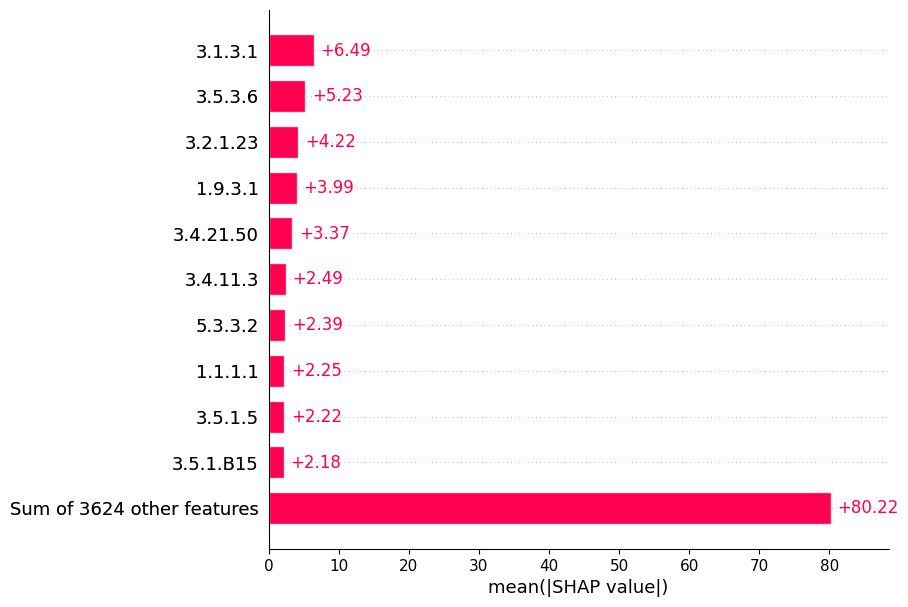

In [161]:
shap.plots.initjs()

explainer = shap.Explainer(model)
shap_values = explainer(X_train) # TOGGLE

shap.plots.bar(shap_values, max_display=11)

In [55]:
# XGBoost Random Forest

xgb_model = xgboost.XGBRFRegressor(random_state=42).fit(X_train, y_train)

r2 = r2_score(y_test, y_pred)
print(f'R^2 = {r2}') # appears to be the same as the XGBoost regressor

R^2 = 0.17698421724446245


## Unsupervised

Need to find better metrics for this as well, for the same reasons as above (i.e., AUC-ROC can only be applied to classifiers, which UMAP is not). However, linking to n-neighbors or K-Neighbors analysis/classifier could potentially allow us to do this

Model and metrics

In [139]:
reducer = umap.UMAP(             
    metric="euclidean",
    n_epochs=500, 
    random_state=RANDOM_SEED,
    n_jobs=1,
    n_components=2, 
    n_neighbors=73, 
    min_dist=0
)

# Fit and transform
X_train_transformed = reducer.fit_transform(X_train) 
X_test_transformed = reducer.transform(X_test) 

# Cluster using maximum coefficient's n_clusters
clusterer = KMeans(n_clusters=12, random_state=RANDOM_SEED)

training_clusters = clusterer.fit_predict(X_train_transformed)
test_clusters = clusterer.predict(X_test_transformed)

# Further dimensionality reduction and clustering performance
silhouette_avg = silhouette_score(X_train_transformed, training_clusters)

print(clusterer.labels_.max()+1, "KMeans training clusters")
print(f"Average Silhouette Score on KMeans clusters: {silhouette_avg}")

12 KMeans training clusters
Average Silhouette Score on KMeans clusters: 0.8258286118507385


In [147]:
svc = SVC().fit(reducer.embedding_, y_train)
knn = KNeighborsClassifier().fit(reducer.embedding_, y_train)

test_embedding = reducer.transform(X_test)
svc.score(reducer.transform(X_test), y_test), knn.score(reducer.transform(X_test), y_test)

(0.15475487300649735, 0.20614294152392204)

Outputs and visualization

In [107]:
# Training data
train_df = pd.DataFrame(X_train_transformed, columns=[f"Component {i+1}" for i in range(X_train_transformed.shape[1])])

train_df['Set'] = 'Training'
y_train_labels = list(y_train)
train_df['Target'] = y_train_labels
train_df['KMeans Cluster'] = training_clusters

print(len(train_df), "training points")

# Test data
test_df = pd.DataFrame(X_test_transformed, columns=[f"Component {i+1}" for i in range(X_test_transformed.shape[1])])

test_df['Set'] = 'Test'
y_test_labels = list(y_test)
test_df['Target'] = y_test_labels
test_df['KMeans Cluster'] = test_clusters

print(len(test_df), "test points")

# Reverse mapping of media labels
reverse_media_id_mapping = {v: k for k, v in media_id_mapping.items()}
train_df['media_id'] = df_train['media_id_float'].map(reverse_media_id_mapping)
test_df['media_id'] = df_train['media_id_float'].map(reverse_media_id_mapping)

2657 training points
665 test points


In [108]:
# Retrieve media_clusters from the "Media Clustering" Components as features section
media_clusters = media_clusters.copy()
media_clusters = media_clusters.rename(columns={"KMeans Cluster": "Media Cluster"})

# Merge dataframes with media_cluster info
df1 = pd.merge(left=train_df, right=media_clusters, on="media_id", how="left")
df2 = pd.merge(left=test_df, right=media_clusters, on="media_id", how="left")

In [126]:
training_dataframe = df1 # train_df | df1
test_dataframe = df2 # test_df | df2

fig = px.scatter(
    data_frame = training_dataframe,
    x = "Component 1",
    y = "Component 2", 
    color = "Media Cluster",
    hover_data = ["media_id", "KMeans Cluster"],
    opacity = 0.8
) 

fig.add_trace(
    go.Scatter(
        x=test_dataframe["Component 1"],  # x coordinates
        y=test_dataframe["Component 2"],  # y coordinates
        mode='markers',
        marker=dict(
            color='black',  
            size=5,  
            opacity=0.5 
        ),
        text=test_dataframe["media_id"]  # marker hover text
    )
)

fig.update_coloraxes(showscale=False)
fig.update_layout(
    template="plotly_white",
    showlegend=False,
    width=500, 
    height=500
)

fig.show()

In [166]:
#TODO: finish media_clustering, use these as labels for training these models, find uniform statistics to apply/compare here

# Komodo

In [1]:
import pandas as pd

komodo = pd.read_csv("~/Desktop/komodo.csv")
komodo

ID  \
0                                                     1   
1                                                    10   
2                                                  1000   
3                                                  1001   
4                                                  1002   
...                                                 ...   
3635                                            9_53796   
3636                                                 9a   
3637                                                NaN   
3638                                                NaN   
3639  If you encounter problems please send their de...   

                                    Name    PH Info Is Complex Is Aerobic  \
0                          NUTRIENT AGAR          7       True      False   
1                       ZYMOMONAS medium        NaN       True      False   
2     MJANHOX-NO3 MEDIUM WITH SUPPLEMENT  7.5 - 8.0      False       True   
3                           BASAL MEDIUM    6.8 - 7      False       True   
4              ECTOTHIORHODOSYNUS medium    9 - 9.5       True      False   
...                                  ...        ...        ...        ...   
3635     MEDIUM 9 MODIFIED FOR DSM 53796        NaN       True      False   
3636                VY/2, REDUCED medium        NaN       True      False   
3637                                 NaN        NaN        NaN        NaN   
3638                                 NaN        NaN        NaN        NaN   
3639                                 NaN        NaN        NaN        NaN   

     Is SubMedium                                       Instructions  
0           False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
1           False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
2           False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
3           False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
4           False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
...           ...                                                ...  
3635        False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
3636        False  http://www.dsmz.de/microorganisms/medium/pdf/D...  
3637          NaN                                                NaN  
3638          NaN                                                NaN  
3639          NaN                                                NaN  

[3640 rows x 7 columns]

In [7]:
komodo["ID"] = komodo["ID"].astype(str)
string = komodo["ID"].str.contains("NaN")
komodo = komodo[~string]
media = komodo["ID"].unique()
len(media)

3639

# Cofactors

In [1]:
import pandas as pd
import os
DATA_DIR = "~/Desktop/code/data"

In [2]:
mags = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"))
taxa = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa.csv"))
print(len(mags), len(taxa))

1226 3437


In [3]:
frames = mags, taxa
cf = pd.concat(frames)
cf = cf.drop_duplicates()
cf

Query EC   Entry   Entry Name                  Gene Names  \
0     1.11.2.4  I3DZK9   CYPC_BACMM  cypC CYP152K6 BMMGA3_06595   
1     1.16.3.1  P00450   CERU_HUMAN                          CP   
2     1.16.3.1  P0ABD3    BFR_ECOLI            bfr b3336 JW3298   
3     1.16.3.1  Q2RVS1    FER_RHORT               fer Rru_A0973   
4      5.3.1.6  P83534  RBSKI_FRUSL     rbsK/rbiA FD36_GL000739   
...        ...     ...          ...                         ...   
3423   3.5.-.-  O88807    PADI4_RAT             Padi4 Pad4 Pdi4   
3424   3.5.-.-  P0A6K3    DEF_ECOLI        def fms b3287 JW3248   
3425   3.5.-.-  P23908   ARGE_ECOLI           argE b3957 JW3929   
3426   3.5.-.-  P33644  PURNU_ECOLI           yfiH b2593 JW2575   
3434   6.2.1.2  O70490    ACSM2_RAT                    Acsm2 Ks   

                                               Organism  Organism (ID)  \
0      Bacillus methanolicus (strain MGA3 / ATCC 53907)         796606   
1                                  Homo sapiens (Human)           9606   
2                         Escherichia coli (strain K12)          83333   
3     Rhodospirillum rubrum (strain ATCC 11170 / ATH...         269796   
4     Fructilactobacillus sanfranciscensis (strain A...        1423800   
...                                                 ...            ...   
3423                            Rattus norvegicus (Rat)          10116   
3424                      Escherichia coli (strain K12)          83333   
3425                      Escherichia coli (strain K12)          83333   
3426                      Escherichia coli (strain K12)          83333   
3434                            Rattus norvegicus (Rat)          10116   

                                      Taxonomic lineage  \
0     cellular organisms (no rank), Bacteria (superk...   
1     cellular organisms (no rank), Eukaryota (super...   
2     cellular organisms (no rank), Bacteria (superk...   
3     cellular organisms (no rank), Bacteria (superk...   
4     cellular organisms (no rank), Bacteria (superk...   
...                                                 ...   
3423  cellular organisms (no rank), Eukaryota (super...   
3424  cellular organisms (no rank), Bacteria (superk...   
3425  cellular organisms (no rank), Bacteria (superk...   
3426  cellular organisms (no rank), Bacteria (superk...   
3434  cellular organisms (no rank), Eukaryota (super...   

                                Taxonomic lineage (Ids)  \
0     131567 (no rank), 2 (superkingdom), 1783272 (c...   
1     131567 (no rank), 2759 (superkingdom), 33154 (...   
2     131567 (no rank), 2 (superkingdom), 1224 (phyl...   
3     131567 (no rank), 2 (superkingdom), 1224 (phyl...   
4     131567 (no rank), 2 (superkingdom), 1783272 (c...   
...                                                 ...   
3423  131567 (no rank), 2759 (superkingdom), 33154 (...   
3424  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
3425  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
3426  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
3434  131567 (no rank), 2759 (superkingdom), 33154 (...   

                                          Protein names  \
0     Fatty-acid peroxygenase (EC 1.11.2.4) (Cytochr...   
1     Ceruloplasmin (Cuproxidase ceruloplasmin) (EC ...   
2     Bacterioferritin (BFR) (EC 1.16.3.1) (Cytochro...   
3     Encapsulated ferritin-like protein (EncFtn) (E...   
4     Bifunctional ribokinase/ribose-5-phosphate iso...   
...                                                 ...   
3423  Protein-arginine deiminase type-4 (EC 3.5.3.15...   
3424  Peptide deformylase (PDF) (EC 3.5.1.88) (Polyp...   
3425  Acetylornithine deacetylase (AO) (Acetylornith...   
3426  Purine nucleoside phosphorylase YfiH (EC 2.4.2...   
3434  Acyl-coenzyme A synthetase ACSM2, mitochondria...   

                                           Binding site  ...  \
0     BINDING 61; /ligand="heme"; /ligand_id="ChEBI:...  ...   
1     BINDING 55; /ligand="Na(+)"; /ligand_id="ChEBI...  

In [4]:
filter = cf["CofactorExtracted"].str.contains("Se")
se = cf[filter]
se

Query EC   Entry   Entry Name Gene Names  \
1200  1.17.1.5  Q0QLF1  NDMMS_EUBBA       ndhM   
1677  1.17.1.-  Q0QLF1  NDMMS_EUBBA       ndhM   
2474   1.-.-.-  Q0QLF1  NDMMS_EUBBA       ndhM   

                                       Organism  Organism (ID)  \
1200  Eubacterium barkeri (Clostridium barkeri)           1528   
1677  Eubacterium barkeri (Clostridium barkeri)           1528   
2474  Eubacterium barkeri (Clostridium barkeri)           1528   

                                      Taxonomic lineage  \
1200  cellular organisms (no rank), Bacteria (superk...   
1677  cellular organisms (no rank), Bacteria (superk...   
2474  cellular organisms (no rank), Bacteria (superk...   

                                Taxonomic lineage (Ids)  \
1200  131567 (no rank), 2 (superkingdom), 1783272 (c...   
1677  131567 (no rank), 2 (superkingdom), 1783272 (c...   
2474  131567 (no rank), 2 (superkingdom), 1783272 (c...   

                                          Protein names  \
1200  Nicotinate dehydrogenase medium molybdopterin ...   
1677  Nicotinate dehydrogenase medium molybdopterin ...   
2474  Nicotinate dehydrogenase medium molybdopterin ...   

                                           Binding site  ...  \
1200  BINDING 45..49; /ligand="Se-Mo-molybdopterin c...  ...   
1677  BINDING 45..49; /ligand="Se-Mo-molybdopterin c...  ...   
2474  BINDING 45..49; /ligand="Se-Mo-molybdopterin c...  ...   

                      BioCyc BRENDA PathwayCommons Reactome  \
1200  MetaCyc:MONOMER-11706;    NaN            NaN      NaN   
1677  MetaCyc:MONOMER-11706;    NaN            NaN      NaN   
2474  MetaCyc:MONOMER-11706;    NaN            NaN      NaN   

                            InterPro      Pfam  \
1200  IPR046867;IPR037165;IPR052516;  PF20256;   
1677  IPR046867;IPR037165;IPR052516;  PF20256;   
2474  IPR046867;IPR037165;IPR052516;  PF20256;   

                              CofactorExtracted  \
1200  Se-Mo-molybdopterin cytosine dinucleotide   
1677  Se-Mo-molybdopterin cytosine dinucleotide   
2474  Se-Mo-molybdopterin cytosine dinucleotide   

                             CofactorNormalized Fe-S cluster  \
1200  Se-Mo-molybdopterin cytosine dinucleotide        False   
1677  Se-Mo-molybdopterin cytosine dinucleotide        False   
2474  Se-Mo-molybdopterin cytosine dinucleotide        False   

                                  CofactorFinal  
1200  Se-Mo-molybdopterin cytosine dinucleotide  
1677  Se-Mo-molybdopterin cytosine dinucleotide  
2474  Se-Mo-molybdopterin cytosine dinucleotide  

[3 rows x 32 columns]

In [7]:
ec = taxa["Query EC"].unique()
len(ec)

1603

In [30]:
import sys
sys.path.append("..")
import modules.cofactors as cofactors

imp_feat = ["1.21.98.3","4.2.3.1", "1.20.4.1", "3.2.1.74", "2.6.1.51", "1.4.1.3", "1.1.1.18", "1.9.3.1", "3.6.1.7"]
features = cofactors.ec2metals(imp_feat)
features.head()

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


Query EC   Entry  Entry Name          Gene Names  \
0  1.21.98.3  P26168  BCHE_RHOCB  bchE RCAP_rcc00669   
1  1.21.98.3  P26168  BCHE_RHOCB  bchE RCAP_rcc00669   
2  1.21.98.3  P26168  BCHE_RHOCB  bchE RCAP_rcc00669   
3  1.21.98.3  Q7X2C7  BCHE_RUBGE                bchE   
4  1.21.98.3  Q7X2C7  BCHE_RUBGE                bchE   

                                            Organism Organism (ID)  \
0  Rhodobacter capsulatus (strain ATCC BAA-309 / ...        272942   
1  Rhodobacter capsulatus (strain ATCC BAA-309 / ...        272942   
2  Rhodobacter capsulatus (strain ATCC BAA-309 / ...        272942   
3  Rubrivivax gelatinosus (Rhodocyclus gelatinosu...         28068   
4  Rubrivivax gelatinosus (Rhodocyclus gelatinosu...         28068   

                                   Taxonomic lineage  \
0  cellular organisms (no rank), Bacteria (superk...   
1  cellular organisms (no rank), Bacteria (superk...   
2  cellular organisms (no rank), Bacteria (superk...   
3  cellular organisms (no rank), Bacteria (superk...   
4  cellular organisms (no rank), Bacteria (superk...   

                             Taxonomic lineage (Ids)  \
0  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
1  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
2  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
3  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
4  131567 (no rank), 2 (superkingdom), 1224 (phyl...   

                                       Protein names  \
0  Anaerobic magnesium-protoporphyrin IX monometh...   
1  Anaerobic magnesium-protoporphyrin IX monometh...   
2  Anaerobic magnesium-protoporphyrin IX monometh...   
3  Anaerobic magnesium-protoporphyrin IX monometh...   
4  Anaerobic magnesium-protoporphyrin IX monometh...   

                                        Binding site  ...  \
0  BINDING 204; /ligand="[4Fe-4S] cluster"; /liga...  ...   
1  BINDING 204; /ligand="[4Fe-4S] cluster"; /liga...  ...   
2  BINDING 204; /ligand="[4Fe-4S] cluster"; /liga...  ...   
3  BINDING 205; /ligand="[4Fe-4S] cluster"; /liga...  ...   
4  BINDING 205; /ligand="[4Fe-4S] cluster"; /liga...  ...   

                   BioCyc      BRENDA PathwayCommons Reactome  \
0  MetaCyc:MONOMER-13265;  1.21.98.3;            NaN      NaN   
1  MetaCyc:MONOMER-13265;  1.21.98.3;            NaN      NaN   
2  MetaCyc:MONOMER-13265;  1.21.98.3;            NaN      NaN   
3                     NaN  1.21.98.3;            NaN      NaN   
4                     NaN  1.21.98.3;            NaN      NaN   

                                            InterPro              Pfam  \
0  IPR006158;IPR036724;IPR006638;IPR034466;IPR007...  PF02310;PF04055;   
1  IPR006158;IPR036724;IPR006638;IPR034466;IPR007...  PF02310;PF04055;   
2  IPR006158;IPR036724;IPR006638;IPR034466;IPR007...  PF02310;PF04055;   
3  IPR006158;IPR006638;IPR034466;IPR007197;IPR023...  PF02310;PF04055;   
4  IPR006158;IPR006638;IPR034466;IPR007197;IPR023...  PF02310;PF04055;   

        CofactorExtracted CofactorNormalized Fe-S cluster CofactorFinal  
0        [4Fe-4S] cluster   [4Fe-4S] cluster         True            Fe  
1        [4Fe-4S] cluster   [4Fe-4S] cluster         True             S  
2  adenosylcob(III)alamin                 Co        False            Co  
3        [4Fe-4S] cluster   [4Fe-4S] cluster         True            Fe  
4        [4Fe-4S] cluster   [4Fe-4S] cluster         True             S  

[5 rows x 32 columns]

In [31]:
features.dtypes

Query EC                   object
Entry                      object
Entry Name                 object
Gene Names                 object
Organism                   object
Organism (ID)              object
Taxonomic lineage          object
Taxonomic lineage (Ids)    object
Protein names              object
Binding site               object
Catalytic activity         object
Cofactor                   object
Function [CC]              object
Pathway                    object
Protein families           object
RefSeq                     object
PDB                        object
KEGG                       object
eggNOG                     object
BindingDB                  object
ChEMBL                     object
CAZy                       object
BioCyc                     object
BRENDA                     object
PathwayCommons             object
Reactome                   object
InterPro                   object
Pfam                       object
CofactorExtracted          object
CofactorNormal

In [25]:
df = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv"), low_memory=False)
imp_feat = ["1.21.98.3","4.2.3.1", "1.20.4.1", "3.2.1.74", "2.6.1.51", "1.4.1.3", "1.1.1.18", "1.9.3.1", "3.6.1.7"]
filter = df["Query EC"].isin(imp_feat)
imp_ec = df[filter]
imp_ec = imp_ec.drop_duplicates()
imp_ec

Query EC   Entry   Entry Name  \
22715  1.21.98.3  P26168   BCHE_RHOCB   
22716  1.21.98.3  P26168   BCHE_RHOCB   
22717  1.21.98.3  P26168   BCHE_RHOCB   
22718  1.21.98.3  Q7X2C7   BCHE_RUBGE   
22719  1.21.98.3  Q7X2C7   BCHE_RUBGE   
22720  1.21.98.3  Q7X2C7   BCHE_RUBGE   
22721  1.21.98.3  Q55373   BCHE_SYNY3   
22722  1.21.98.3  Q55373   BCHE_SYNY3   
22723  1.21.98.3  Q55373   BCHE_SYNY3   
22724  1.21.98.3  Q9RFD3   BCHE_CERS4   
22725  1.21.98.3  Q9RFD3   BCHE_CERS4   
22726  1.21.98.3  Q9RFD3   BCHE_CERS4   
38414   1.20.4.1  Q8GY31  CDC25_ARATH   

                                    Gene Names  \
22715                       bchE RCAP_rcc00669   
22716                       bchE RCAP_rcc00669   
22717                       bchE RCAP_rcc00669   
22718                                     bchE   
22719                                     bchE   
22720                                     bchE   
22721                             bchE slr0905   
22722                             bchE slr0905   
22723                             bchE slr0905   
22724                bchE RHOS4_18860 RSP_0281   
22725                bchE RHOS4_18860 RSP_0281   
22726                bchE RHOS4_18860 RSP_0281   
38414  CDC25 ACR2 ASR STR5 At5g03455 F12E4_220   

                                                Organism  Organism (ID)  \
22715  Rhodobacter capsulatus (strain ATCC BAA-309 / ...         272942   
22716  Rhodobacter capsulatus (strain ATCC BAA-309 / ...         272942   
22717  Rhodobacter capsulatus (strain ATCC BAA-309 / ...         272942   
22718  Rubrivivax gelatinosus (Rhodocyclus gelatinosu...          28068   
22719  Rubrivivax gelatinosus (Rhodocyclus gelatinosu...          28068   
22720  Rubrivivax gelatinosus (Rhodocyclus gelatinosu...          28068   
22721       Synechocystis sp. (strain PCC 6803 / Kazusa)        1111708   
22722       Synechocystis sp. (strain PCC 6803 / Kazusa)        1111708   
22723       Synechocystis sp. (strain PCC 6803 / Kazusa)        1111708   
22724  Cereibacter sphaeroides (strain ATCC 17023 / D...         272943   
22725  Cereibacter sphaeroides (strain ATCC 17023 / D...         272943   
22726  Cereibacter sphaeroides (strain ATCC 17023 / D...         272943   
38414             Arabidopsis thaliana (Mouse-ear cress)           3702   

                                       Taxonomic lineage  \
22715  cellular organisms (no rank), Bacteria (superk...   
22716  cellular organisms (no rank), Bacteria (superk...   
22717  cellular organisms (no rank), Bacteria (superk...   
22718  cellular organisms (no rank), Bacteria (superk...   
22719  cellular organisms (no rank), Bacteria (superk...   
22720  cellular organisms (no rank), Bacteria (superk...   
22721  cellular organisms (no rank), Bacteria (superk...   
22722  cellular organisms (no rank), Bacteria (superk...   
22723  cellular organisms (no rank), Bacteria (superk...   
22724  cellular organisms (no rank), Bacteria (superk...   
22725  cellular organisms (no rank), Bacteria (superk...   
22726  cellular organisms (no rank), Bacteria (superk...   
38414  cellular organisms (no rank), Eukaryota (super...   

                                 Taxonomic lineage (Ids)  \
22715  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22716  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22717  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22718  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22719  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22720  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22721  131567 (no rank), 2 (superkingdom), 1783272 (c...   
22722  131567 (no rank), 2 (superkingdom), 1783272 (c...   
22723  131567 (no rank), 2 (superkingdom), 1783272 (c...   
22724  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22725  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
22726  131567 (no rank), 2 (superkingdom), 1224 (phyl...   
38414  131567 (no rank), 2759 (superkingdom), 33090 (...   


# Taxa

In [14]:
bd = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd["ncbi_tax_id_matching_level"] = bd["ncbi_tax_id_matching_level"].astype(str)
filt = bd["ncbi_tax_id_matching_level"].str.contains("species")
nan = bd["ncbi_tax_id_matching_level"].str.contains("nan")
bd = bd[filt & ~nan]
tax = bd["taxon_id"].unique()
len(tax)

7910

In [19]:
md = pd.read_csv(os.path.join(DATA_DIR, "mediadive", "mediadive-all.csv"), sep=";", low_memory=False)
md["species"] = md["species"].astype(str)
nan = md["species"].str.contains("nan")
md = md[~nan]
tax = md["species"].unique()
len(tax)

12336